# 라라라

In [17]:
!wget http://www.timeseriesclassification.com/Downloads/FordA.zip

--2022-06-04 23:09:01--  http://www.timeseriesclassification.com/Downloads/FordA.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36365254 (35M) [application/zip]
Saving to: 'FordA.zip'

     0K .......... .......... .......... .......... ..........  0% 88.4K 6m41s
    50K .......... .......... .......... .......... ..........  0%  178K 5m0s
   100K .......... .......... .......... .......... ..........  0% 11.7M 3m21s
   150K .......... .......... .......... .......... ..........  0% 11.3M 2m31s
   200K .......... .......... .......... .......... ..........  0%  180K 2m40s
   250K .......... .......... .......... .......... ..........  0% 11.4M 2m13s
   300K .......... .......... .......... .......... ..........  0% 11.3M 1m55s
   350K .......... .......... ..........

In [21]:
!unzip FordA.zip

Archive:  FordA.zip
  inflating: FordA.txt               
  inflating: FordA_TEST.arff         
  inflating: FordA_TEST.txt          
  inflating: FordA_TRAIN.arff        
  inflating: FordA_TRAIN.txt         
  inflating: FordA_TEST.ts           
  inflating: FordA_TRAIN.ts          


In [41]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

In [30]:
seq_data = []
for i in np.arange(0,1000):
    seq_data += [[np.sin( np.pi * i * 0.01)]]
X, y = make_sample(seq_data, 10)

In [31]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10,1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

Epoch 1/100
31/31 [==============================] - 3s 10ms/step - loss: 0.4176
Epoch 2/100
31/31 [==============================] - 0s 10ms/step - loss: 0.1020
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0621
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0492
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0394
Epoch 6/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0317
Epoch 7/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 8/100
31/31 [==============================] - ETA: 0s - loss: 0.020 - 0s 10ms/step - loss: 0.0208
Epoch 9/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0172
Epoch 10/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0151
Epoch 11/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0139
Epoch 12/100
31/31 [==============================] - 0s 11ms/step - loss: 0.0130
Ep

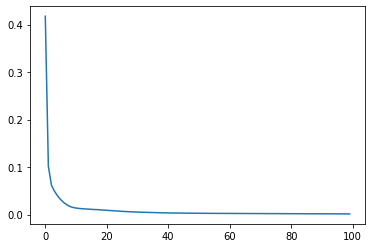

In [33]:
history = model.fit(X, y, epochs=100, verbose=1)
plt.plot(history.history['loss'], label='loss')
plt.show()

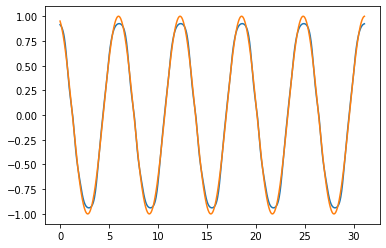

In [39]:
seq_data = []
for i in np.arange(0, 1000):
    seq_data += [[np.cos(np.pi*i*0.01)]]

X, y = make_sample(seq_data, 10)

y_pred = model.predict(X, verbose=0)
plt.plot(np.pi*np.arange(0, 990)*0.01, y_pred)
plt.plot(np.pi*np.arange(0, 990)*0.01, y)
plt.show()

# 11장 연습문제

## 9번 문제

In [67]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3601, 500)
(3601,)
(1320, 500)
(1320,)


In [75]:
print(y_train[5])

1


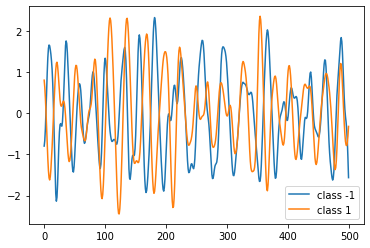

In [87]:
classes = np.unique(y_train, axis=0)

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [91]:
# 데이터 전처리
## 데이터 표준화


# 우리의 타임시리즈는 이미 하나의 길이이지만, 그들의 값들은 다양한 길이를 가지고 있다.
# 이것은 뉴럴 네트워크에 적합하지 않다. 보통 우리는 입력값을 표준화할 필요가 있다.
# 이러한 데이터셋은 특히, z-normalized된 것인데, 각각의 타임시리즈 샘플들은
# 평균이 0이고 표준편차는 1이다.
# 이러한 타입의 표준화는 타임시리즈 분류에 매우 보현화되어 있다.

# 여기에 사용된 시계열 데이터는 단변량이다.
# 즉, 시계열 예제당 하나의 채널만 있음을 의미한다는 것이다.
# 우리는 그러므로 numpy를 통해 간단한 reshaping을 사용하여
# 하나의 채널이 있는 다변수 시계열로 변환시킬 것이다.
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3601, 500, 1)
(3601,)
(1320, 500, 1)
(1320,)


In [92]:
# spase_categorical_crossentropy를 사용하기 위해 class의 갯수를 저장한다.
num_classes = len(np.unique(y_train))

In [93]:
# np.random.permutation은 무작위로 섞인 배열을 만든다.
idx = np.random.permutation(len(x_train))

# 넘파이의 인덱스 연산을 사용한다.
x_train = x_train[idx]
y_train = y_train[idx]

In [94]:
# 라벨들을 양의 정수로 바꿔준다.
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [96]:
print(y_train)

[1 1 1 ... 1 0 0]


In [97]:
# 모델 설계
from tensorflow import keras

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [99]:
model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [102]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 2s 10ms/step - loss: 0.1286 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.7753 - val_sparse_categorical_accuracy: 0.7268 - lr: 0.0010
Epoch 2/500
90/90 [==============================] - 1s 7ms/step - loss: 0.1257 - sparse_categorical_accuracy: 0.9569 - val_loss: 0.5446 - val_sparse_categorical_accuracy: 0.7836 - lr: 0.0010
Epoch 3/500
90/90 [==============================] - 1s 7ms/step - loss: 0.1323 - sparse_categorical_accuracy: 0.9549 - val_loss: 0.2975 - val_sparse_categorical_accuracy: 0.8488 - lr: 0.0010
Epoch 4/500
90/90 [==============================] - 1s 7ms/step - loss: 0.1410 - sparse_categorical_accuracy: 0.9507 - val_loss: 0.2594 - val_sparse_categorical_accuracy: 0.8724 - lr: 0.0010
Epoch 5/500
90/90 [==============================] - 1s 7ms/step - loss: 0.1129 - sparse_categorical_accuracy: 0.9618 - val_loss: 0.1556 - val_sparse_categorical_accuracy: 0.9445 - lr: 0.0010
Epoch 6/500
90/90 [====================

In [103]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 0s 9ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9652
Test accuracy 0.9651514887809753
Test loss 0.11283111572265625


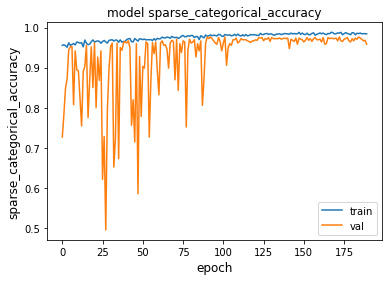

In [104]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [105]:
def make_LSTM_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    lstm1 = keras.layers.LSTM(100, activation='tanh', return_sequnces=False)(input_layer)
    
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(lstm1)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [106]:
lstm_model = make_model(input_shape=x_train.shape[1:])

In [109]:
lstm_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [110]:
history = lstm_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 2s 11ms/step - loss: 0.6025 - sparse_categorical_accuracy: 0.6580 - val_loss: 0.7866 - val_sparse_categorical_accuracy: 0.4924 - lr: 0.0010
Epoch 2/500
90/90 [==============================] - 1s 7ms/step - loss: 0.4785 - sparse_categorical_accuracy: 0.7580 - val_loss: 0.7905 - val_sparse_categorical_accuracy: 0.4924 - lr: 0.0010
Epoch 3/500
90/90 [==============================] - 1s 7ms/step - loss: 0.4448 - sparse_categorical_accuracy: 0.7712 - val_loss: 0.6840 - val_sparse_categorical_accuracy: 0.4965 - lr: 0.0010
Epoch 4/500
90/90 [==============================] - 1s 7ms/step - loss: 0.4234 - sparse_categorical_accuracy: 0.7799 - val_loss: 0.6557 - val_sparse_categorical_accuracy: 0.6186 - lr: 0.0010
Epoch 5/500
90/90 [==============================] - 1s 7ms/step - loss: 0.4238 - sparse_categorical_accuracy: 0.7965 - val_loss: 0.7460 - val_sparse_categorical_accuracy: 0.5492 - lr: 0.0010
Epoch 6/500
90/90 [====================

In [112]:
test_loss, test_acc = lstm_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 0s 10ms/step - loss: 0.0982 - sparse_categorical_accuracy: 0.9674
Test accuracy 0.967424213886261
Test loss 0.09816991537809372


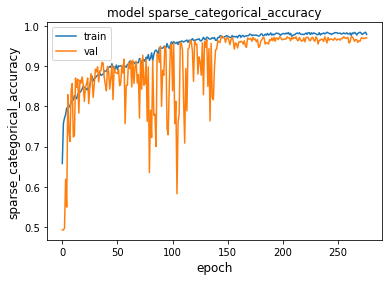

In [113]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
## 10장 문제
